<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Cleaning-dataset" data-toc-modified-id="Cleaning-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning dataset</a></span><ul class="toc-item"><li><span><a href="#Examining-missing-values" data-toc-modified-id="Examining-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examining missing values</a></span></li><li><span><a href="#Examining-collinearity" data-toc-modified-id="Examining-collinearity-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examining collinearity</a></span></li><li><span><a href="#Plot-relations-between--variables" data-toc-modified-id="Plot-relations-between--variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot relations between  variables</a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning dataset

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


### Examining missing values

In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Examining collinearity

<AxesSubplot:>

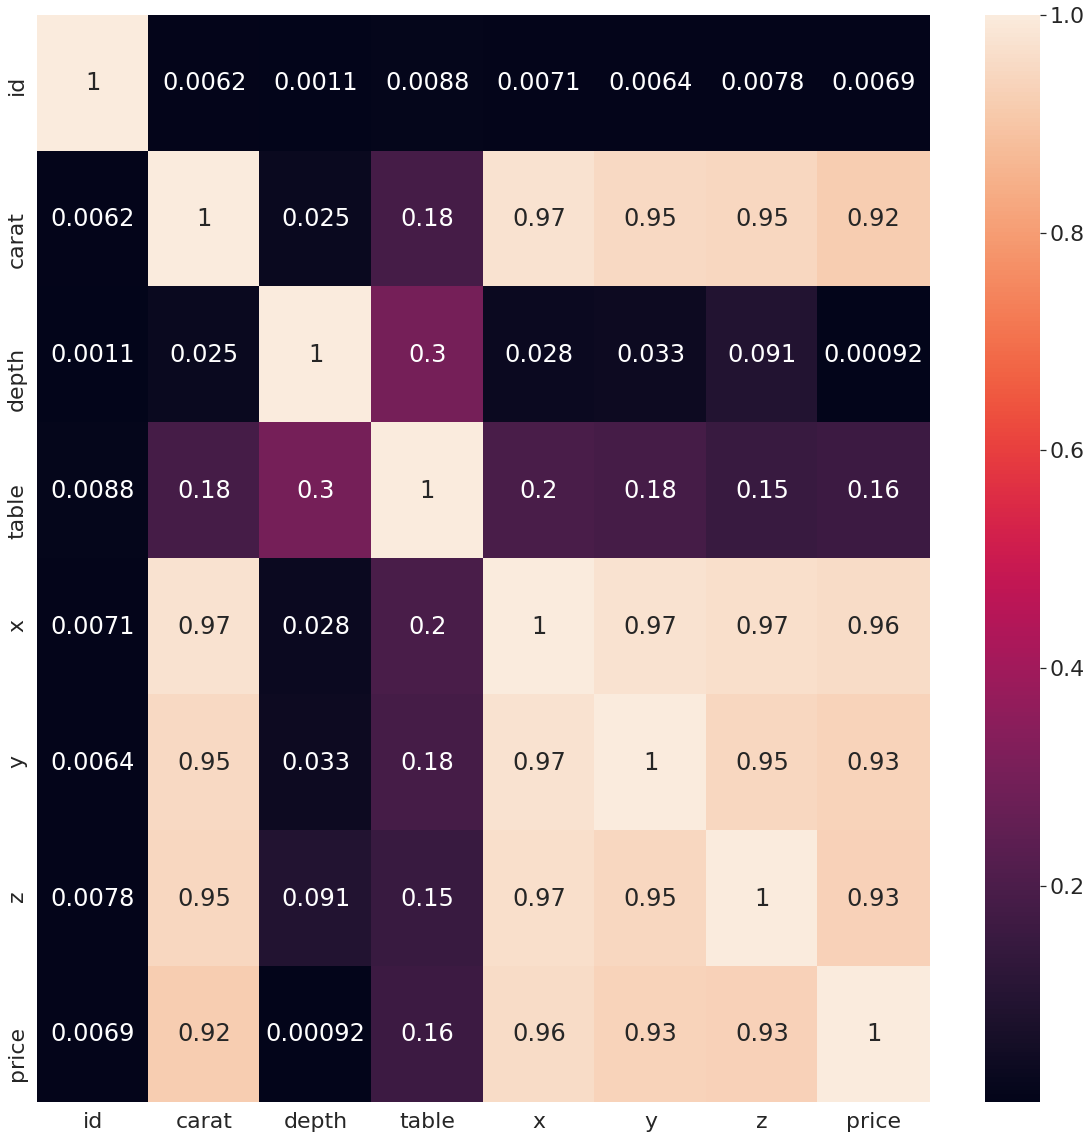

In [6]:
plt.figure(figsize = (20,20))
sns.set(font_scale = 2)
sns.heatmap(df.corr().abs(), annot = True)

### Plot relations between  variables

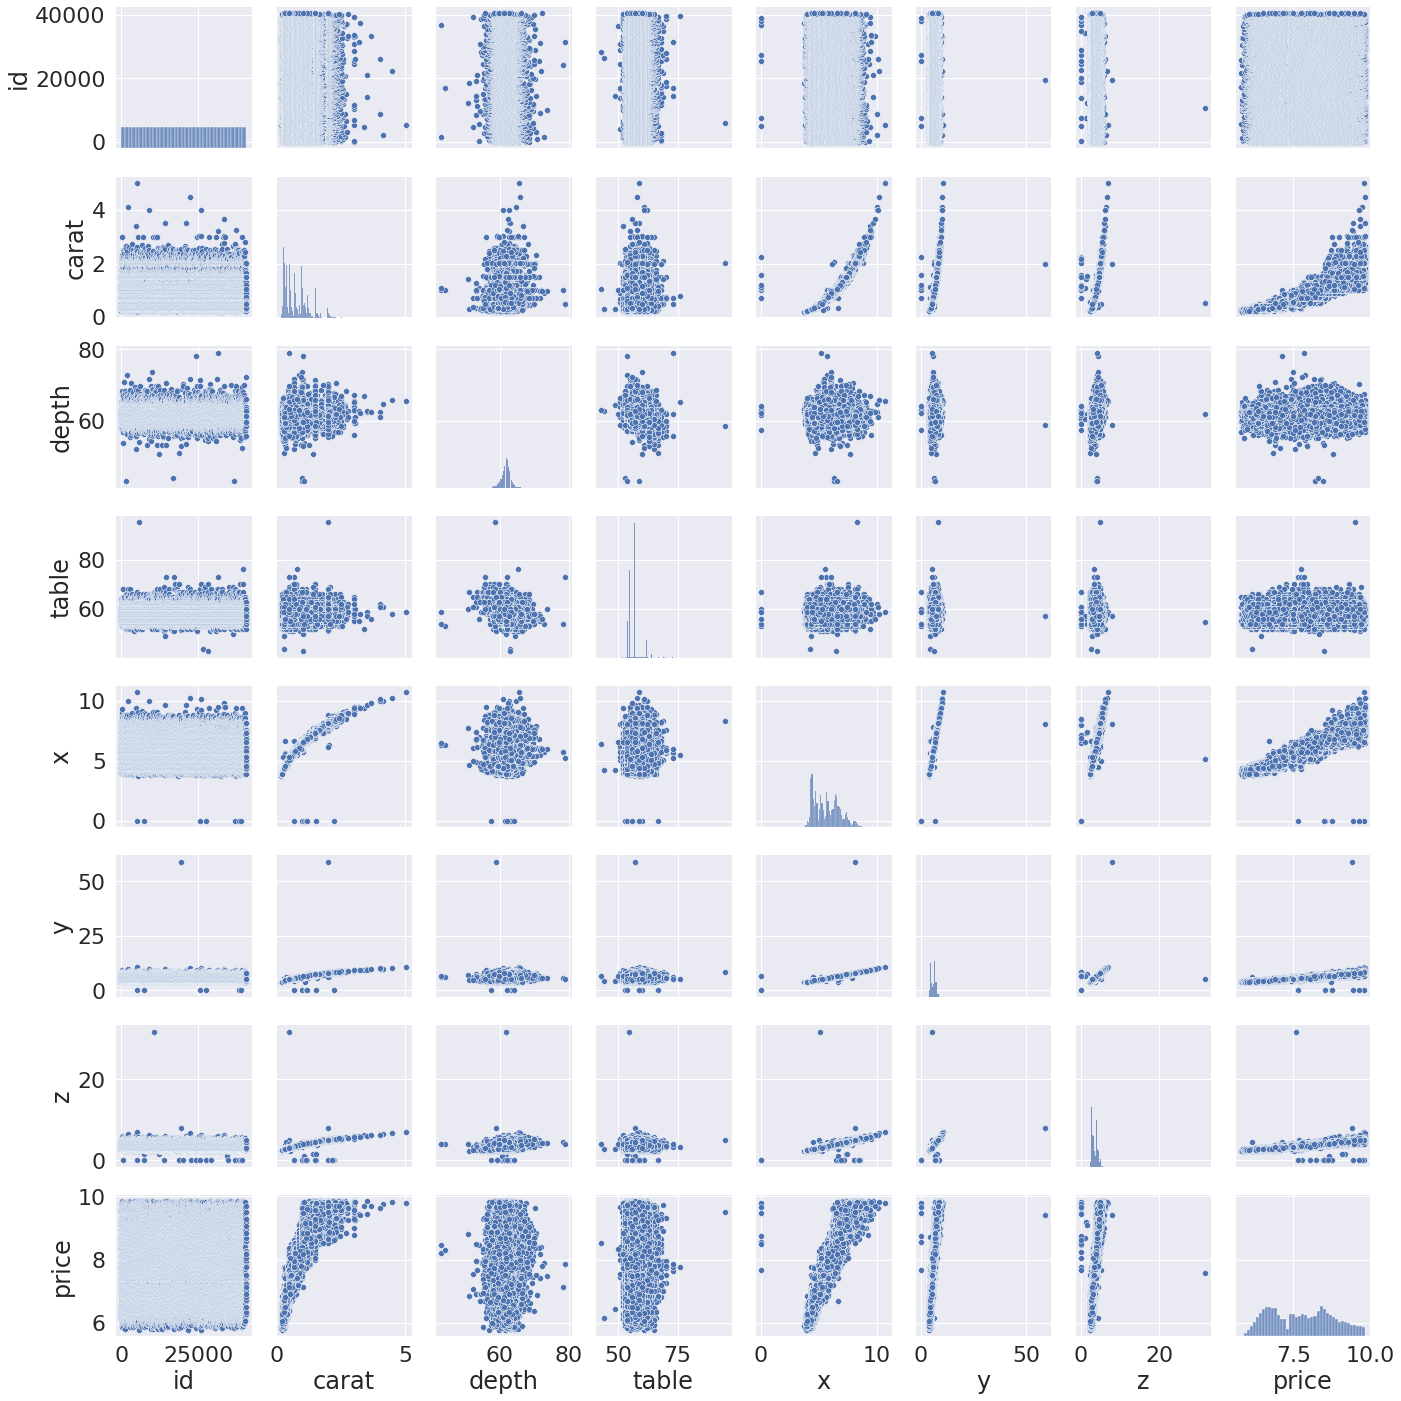

In [7]:
sns.pairplot(df)

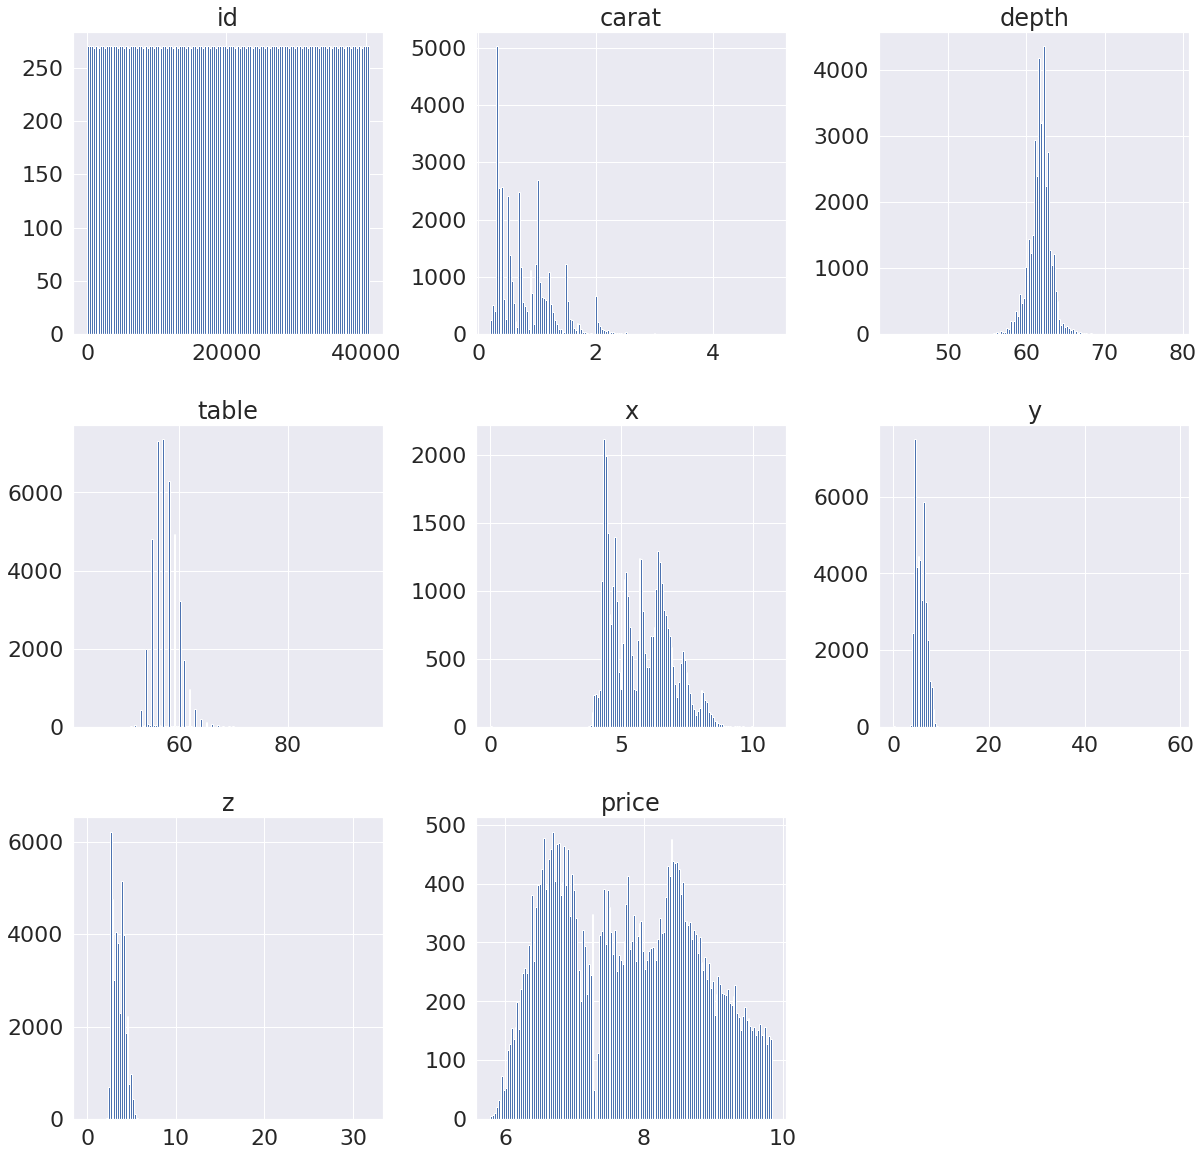

In [9]:
df.hist(figsize = (20,20),bins=150);

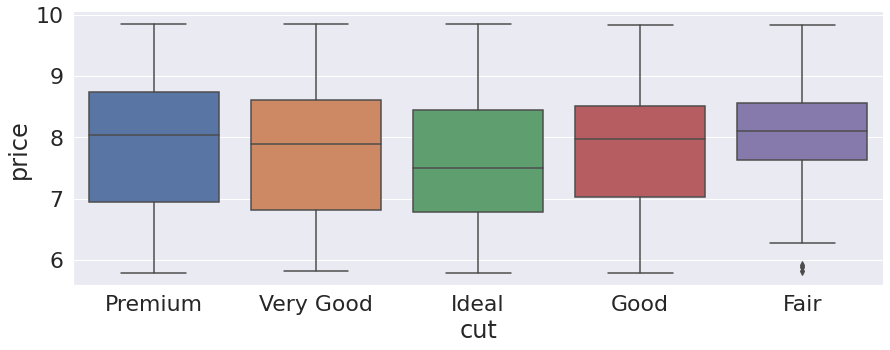

In [13]:
p = sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

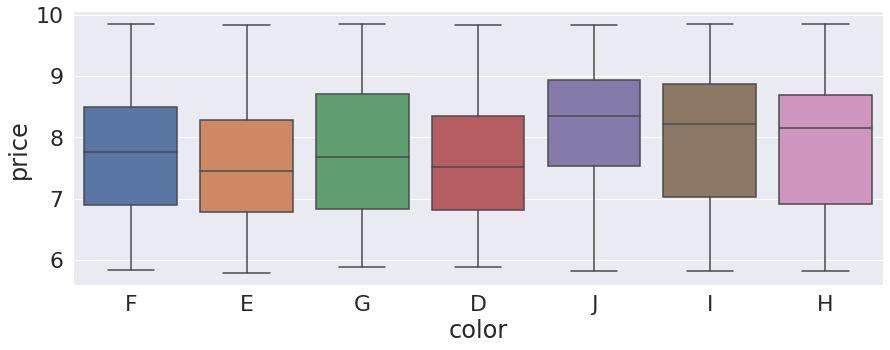

In [14]:
sns.catplot(x='color', y='price', data=df, kind='box' ,aspect=2.5 )

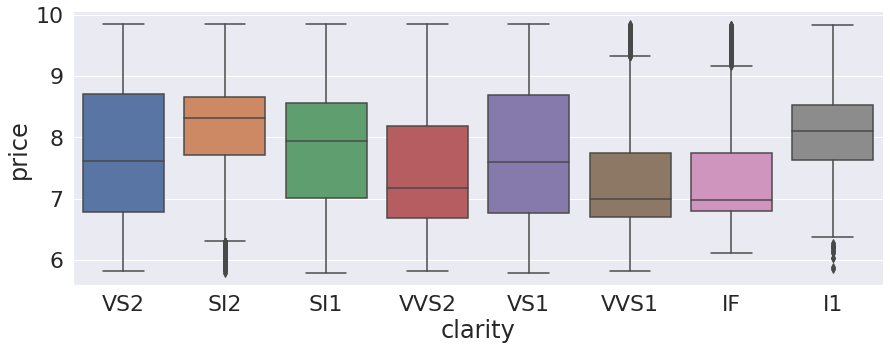

In [15]:
sns.catplot(x='clarity', y='price', data=df, kind='box' ,aspect=2.5)

### Categorical data

In this database we have three categorical variables. We are going to inspect them to see what they are like and see what is the best way to transform them to ordinals.

Categorical variables:
- cut 
- color    
- clarity  

As the three variables have few categories I will do a get dummies for each one of them

In [7]:
encod =  {'Fair': 1, 'Good': 2, 
          'Ideal': 3, 'Premium': 4,
          'Very Good': 5}


In [8]:
def clean (df):
    encod =  {'Fair': 1, 'Good': 2, 
          'Ideal': 3, 'Premium': 4,
          'Very Good': 5}

    df["cut"] = df["cut"].apply(lambda x: encod[x])
    df = pd.get_dummies(df, columns = ["color","clarity"], drop_first = True)
    df = df.reset_index(drop=True)
    return df

In [9]:
df_test = clean(df_test)

In [12]:
df_train = clean(df)

In [15]:
df_test.to_csv("diamons_test.csv", index = False)
df_train.to_csv("diamons_train.csv", index = False)